# 2) USBP Encounters by Administration

### 📌 Note on Graphics
This notebook uses Plotly for its visualizations — I chose it for its ease of use and interactivity. However, GitHub doesn’t support the JavaScript required to render Plotly charts. To improve static rendering, I set:

In [1]:
import plotly.io as pio

pio.renderers.default = "vscode+png"

This generates PNG snapshots alongside the interactive charts. That said, I’ve noticed that scales and annotations sometimes render incorrectly in these static images. If the graphics are important to you, I recommend cloning the repo and running the notebook locally for the full experience.

---

In [1) USBP Monthly Encounters](./1-monthly-encounters.ipynb) we looked at the number of "encounters" the US Border Patrol has had since 2000. We saw that virtually all encounters were at the Southwest Land Border, the graph had a lot of seasonality to it, and it also had unexplained increases and decreases.

Someone at the Department of Homeland Security encouraged me to consider that changes in encounters might be linked to changes in US presidential administrations. One way to test this hypothesis is to add annotations to the graph showing when administrations started. Do the administration changes tend to happen during a large change in the number of encounters? 

Let's start by creating a graph of encounters just at the Southwest Land Border:

In [2]:
import encounters
import plotly.express as px
from datetime import datetime

df = encounters.get_monthly_region_df(output_format="wide")
df.head()

,date,Coastal Border,Northern Land Border,Southwest Land Border
0,1999-10-01,740,1250,87820
1,1999-11-01,500,960,74360
2,1999-12-01,530,1010,66260
3,2000-01-01,690,1140,175380
4,2000-02-01,780,1080,200620


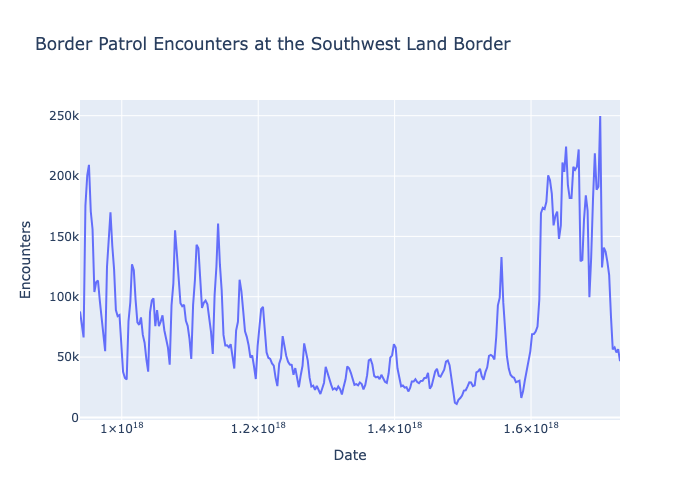

In [3]:
fig = px.line(
    df,
    x="date",
    y="Southwest Land Border",
    title="Border Patrol Encounters at the Southwest Land Border",
    labels={"Southwest Land Border": "Encounters", "date": "Date"},
)

fig.show()

## Data on Administrations

Next we need some way to say when each administration started. This seems like a good candidate for a list of dicts:

In [4]:
administrations = [
    # Include Clinton for reference, but comment out bc his administration did not start during the data period
    # {"President": "Bill Clinton", "Start": datetime(1993, 1, 20)},
    {"President": "George W. Bush", "Start": datetime(2001, 1, 20)},
    {"President": "Barack Obama", "Start": datetime(2009, 1, 20)},
    {"President": "Donald Trump", "Start": datetime(2017, 1, 20)},
    {"President": "Joe Biden", "Start": datetime(2021, 1, 20)},
]

administrations

[{'President': 'George W. Bush',
  'Start': datetime.datetime(2001, 1, 20, 0, 0)},
 {'President': 'Barack Obama', 'Start': datetime.datetime(2009, 1, 20, 0, 0)},
 {'President': 'Donald Trump', 'Start': datetime.datetime(2017, 1, 20, 0, 0)},
 {'President': 'Joe Biden', 'Start': datetime.datetime(2021, 1, 20, 0, 0)}]

We can now iterate over each administration, adding a vertical line to indicate when the administration started, and also who the new president was:

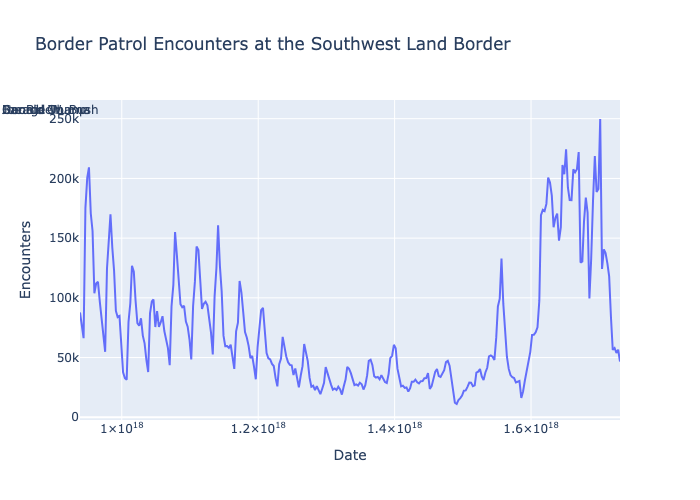

In [5]:
max_y = df["Southwest Land Border"].max()

for one_administration in administrations:
    fig.add_vline(x=one_administration["Start"], line_color="black", line_dash="dash")
    fig.add_annotation(
        x=one_administration["Start"],
        y=max_y,
        text=one_administration["President"],
        xanchor="left",
        xshift=5,
        showarrow=False,
        yanchor="bottom",
    )
fig.show()

## Analysis

Here we can see that the lowest number of encounters occurred shortly after Trump took office the first term (April 2017). And the large, recent spike occurred just as Biden took office.

## `encounters` Module

To make it easier for others (and myself) to create graphs like this, I have wrapped the above code in the function `get_monthly_encounters_graph` in the `encounters` module in this directory. Note that it takes the optional parameter `annotate_administrations`.

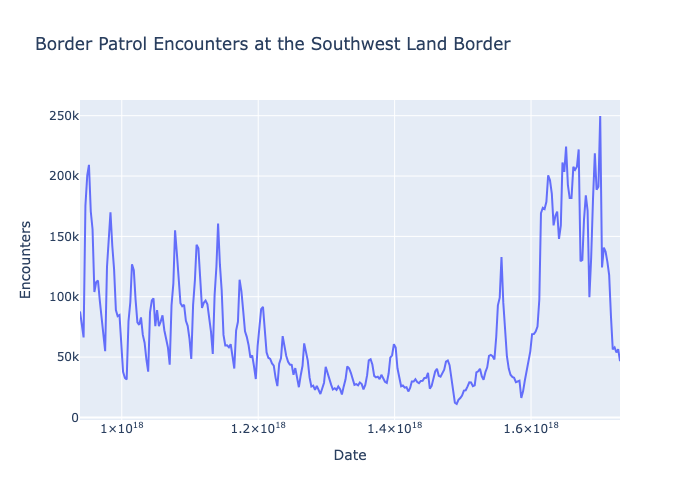

In [6]:
encounters.get_monthly_encounters_graph()

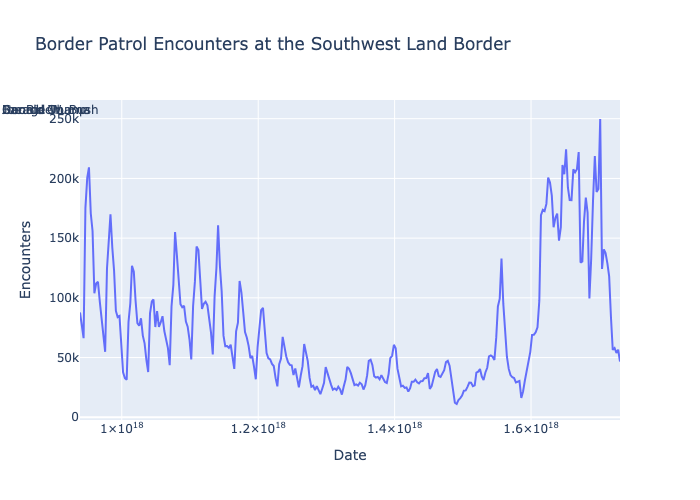

In [7]:
encounters.get_monthly_encounters_graph(annotate_administrations=True)